## Data Science Project

## Contraceptive Method Choice Prediction

## Objective

In this project we are using the Contraceptive Method Choice dataset from the UCI Machine learning repository.
The dataset is a subset of the 1987 National Indonesian Contraceptive Prevalence Survey.The samples are women who
were either pregnant or did not know they were pregnant at the time of the interview.

The probem is to predict the current
contraceptive method choice (no use,long-term methods ,short term methods)of a woman based on her demographic 
and social economic characteristics.

The metric for success: To build a classification model that can effectively predict the current contaceptive method choice.

The dataset: https://archive.ics.uci.ede/ml/machine-learning-databases/cmc
        
        

## The Experimental design taken 


To achieve our objective we will:

1.Data Preprocessing  

2.Do an Exploratory Data Analysis

4.Model Building ;Build classification models

5.Select best model and use it for our prediction

6.Evaluate model performance

7.Deploy with Streamlit

In [122]:
#loading libraries
#Data Manipulation
import pandas as pd
import numpy as np

#Visualisation 
import matplotlib.pyplot as plt
import seaborn as sns

#Feature Selection
from scipy.stats import chi2_contingency
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.decomposition import PCA

#Machine Learning
from sklearn.preprocessing import StandardScaler,LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [123]:
#Loading dataset
df_cmc=pd.read_csv("data/cmc.data")

In [124]:
df_cmc.columns=["Wife's age","Wife's education","Husband's education","Number of children ever born",
              "Wife's religion","Wife's now working","Husband's occupation",
              "Standard of living index", "Media exposure","Contraceptive method used"]
             

In [129]:
df_cmc.to_csv('CMC.csv')

In [125]:
df_cmc.head(5)

,Wife's age,Wife's education,Husband's education,Number of children ever born,Wife's religion,Wife's now working,Husband's occupation,Standard of living index,Media exposure,Contraceptive method used
0,45,1,3,10,1,1,3,4,0,1
1,43,2,3,7,1,1,3,4,0,1
2,42,3,2,9,1,1,3,3,0,1
3,36,3,3,8,1,1,3,2,0,1
4,19,4,4,0,1,1,3,3,0,1


In [53]:
df_cmc.nunique()

Wife's age                      34
Wife's education                 4
Husband's education              4
Number of children ever born    15
Wife's religion                  2
Wife's now working               2
Husband's occupation             4
Standard of living index         4
Media exposure                   2
Contraceptive method used        3
dtype: int64

In [54]:
df_cmc.shape

(1472, 10)

In [55]:
df_cmc.columns=df_cmc.columns.str.replace(" ",'_').str.lower()

In [56]:
df_cmc.columns

Index(['wife's_age', 'wife's_education', 'husband's_education',
       'number_of_children_ever_born', 'wife's_religion', 'wife's_now_working',
       'husband's_occupation', 'standard_of_living_index', 'media_exposure',
       'contraceptive_method_used'],
      dtype='object')

In [57]:
df_cmc.isnull().sum()

wife's_age                      0
wife's_education                0
husband's_education             0
number_of_children_ever_born    0
wife's_religion                 0
wife's_now_working              0
husband's_occupation            0
standard_of_living_index        0
media_exposure                  0
contraceptive_method_used       0
dtype: int64

In [58]:
df_cmc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   wife's_age                    1472 non-null   int64
 1   wife's_education              1472 non-null   int64
 2   husband's_education           1472 non-null   int64
 3   number_of_children_ever_born  1472 non-null   int64
 4   wife's_religion               1472 non-null   int64
 5   wife's_now_working            1472 non-null   int64
 6   husband's_occupation          1472 non-null   int64
 7   standard_of_living_index      1472 non-null   int64
 8   media_exposure                1472 non-null   int64
 9   contraceptive_method_used     1472 non-null   int64
dtypes: int64(10)
memory usage: 115.1 KB


The dataset has 1472 rows and 10 columns with  contraceptive_method_used being the target variable.

Attribute Information:

1.wife's age(numerical)

2.wife's education(categorical)1=low,2,3,4=high

3.husband's education(categorical)1=low,2,3,4=high

4.number of children ever born (numerical)

5.wife's religion(categorical) 0=Yes,1=No

6.wife's now working(categorical) 0=Yes,1=No

7.husband's occupation(categorical)1,2,3,4

8.standard of living index(categorical)1=low,2,3,4=high

9.media exposure(categorical)0=Good,1=Not good

10.contraceptive method used(categorical)1=No-use 2=Long-term 3=Short-term

Missing Values:None

## Exploratory data analysis

In [59]:
columns=["wife's_age", "wife's_education", "husband's_education",
       'number_of_children_ever_born', "wife's_religion",
       "husband's_occupation", "wife's_now_working",
       'standard_of_living_index', 'standard_of_living_index','media_exposure',
       'contraceptive_method_used']

In [60]:
numerical_discrete = []
numerical_continous=[]
for column in df_cmc.columns:
        if df_cmc[column].nunique() < 10:
            numerical_discrete.append(column)
        else:
            numerical_continous.append(column)               
numerical_discrete.remove('contraceptive_method_used')
numerical_discrete

["wife's_education",
 "husband's_education",
 "wife's_religion",
 "wife's_now_working",
 "husband's_occupation",
 'standard_of_living_index',
 'media_exposure']

In [61]:
numerical_continous

["wife's_age", 'number_of_children_ever_born']

### Univariate Analysis

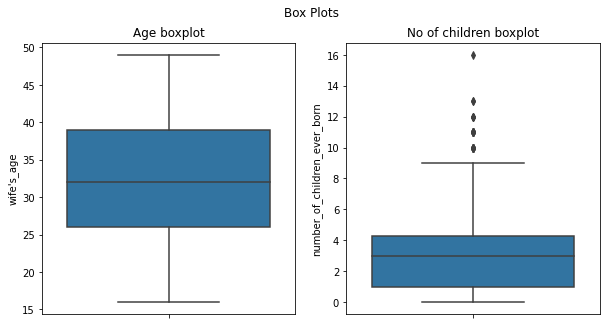

In [14]:
##Plotting the outliers
fig,ax=plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Box Plots')
sns.boxplot(data=df_cmc,y="wife's_age",ax=ax[0])
ax[0].set_title('Age boxplot')
sns.boxplot(data=df_cmc,y="number_of_children_ever_born",ax=ax[1])
ax[1].set_title('No of children boxplot')
plt.show()


Plotted box plots for the continous variables.The no of children born had many outliers

Count plots of the categorical variables.

In [ ]:
fig,axes=plt.subplots(4,2,figsize=(20,20))
sns.color_palette("flare")
sns.countplot(ax=axes[0,0],data=df_cmc,x="wife's_education",palette="flare")
sns.countplot(ax=axes[0,1],data=df_cmc,x="husband's_education",palette="flare")
sns.countplot(ax=axes[1,0],data=df_cmc,x="wife's_religion",palette="flare")
sns.countplot(ax=axes[1,1],data=df_cmc,x="wife's_now_working",palette="flare")
sns.countplot(ax=axes[2,0],data=df_cmc,x="husband's_occupation",palette="flare")
sns.countplot(ax=axes[2,1],data=df_cmc,x="standard_of_living_index",palette="flare")
sns.countplot(ax=axes[3,0],data=df_cmc,x="media_exposure",palette="flare")
sns.countplot(ax=axes[3,1],data=df_cmc,x="contraceptive_method_used",palette="flare")

In [ ]:
#plotting the numerical variables
fig,ax=plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Continous Variable Plots')
sns.histplot(data=df_cmc,x="wife's_age",ax=ax[0])
sns.histplot(data=df_cmc,x="number_of_children_ever_born",ax=ax[1])
sns.despine()

fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(data=df_cmc,x="wife's_age",bins=10,ax=ax[0])
sns.countplot(data=df_cmc,x="number_of_children_ever_born",bins=5,ax=ax[1])

### Bivariate Analysis

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Continous Variable Plots')
sns.boxplot(data=df_cmc,x='contraceptive_method_used',y="wife's_age",hue='contraceptive_method_used',ax=ax[0])
sns.boxplot(data=df_cmc,x='contraceptive_method_used',y="number_of_children_ever_born",hue='contraceptive_method_used',ax=ax[1])

In [ ]:
#plotting the numerical variables
fig,ax=plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Continous Variable Plots')
sns.histplot(data=df_cmc,x="wife's_age",hue="contraceptive_method_used",ax=ax[0],palette='gnuplot2_r')
sns.histplot(data=df_cmc,x="number_of_children_ever_born",hue="contraceptive_method_used",ax=ax[1],palette='gnuplot2_r')
sns.despine()

In [ ]:
fig,axes=plt.subplots(4,2,figsize=(20,20))
sns.color_palette("flare")
sns.countplot(ax=axes[0,0],data=df_cmc,x="wife's_education",hue="contraceptive_method_used",palette="flare")
sns.countplot(ax=axes[0,1],data=df_cmc,x="husband's_education",hue="contraceptive_method_used",palette="flare")
sns.countplot(ax=axes[1,0],data=df_cmc,x="wife's_religion",hue="contraceptive_method_used",palette="flare")
sns.countplot(ax=axes[1,1],data=df_cmc,x="wife's_now_working",hue="contraceptive_method_used",palette="flare")
sns.countplot(ax=axes[2,0],data=df_cmc,x="husband's_occupation",hue="contraceptive_method_used",palette="flare")
sns.countplot(ax=axes[2,1],data=df_cmc,x="standard_of_living_index",hue="contraceptive_method_used",palette="flare")
sns.countplot(ax=axes[3,0],data=df_cmc,x="media_exposure",hue="contraceptive_method_used",palette="flare")

what demographics are most popular with contraceptive users
advert to contraceptive users


### preprocessing 

In [62]:
def remove_outlier(column):
    q25 = column.quantile(0.25)
    q75 = column.quantile(0.75)
    iqr = q75 - q25
    cutoff = iqr * 1.5
    lower = q25 - cutoff
    upper = q75 + cutoff
    return lower, upper

In [63]:
for column in numerical_continous:
    lower, upper = remove_outlier(df_cmc[column])
    df_cmc = df_cmc.loc[(df_cmc[column] > lower) & (df_cmc[column] < upper)]

<AxesSubplot:>

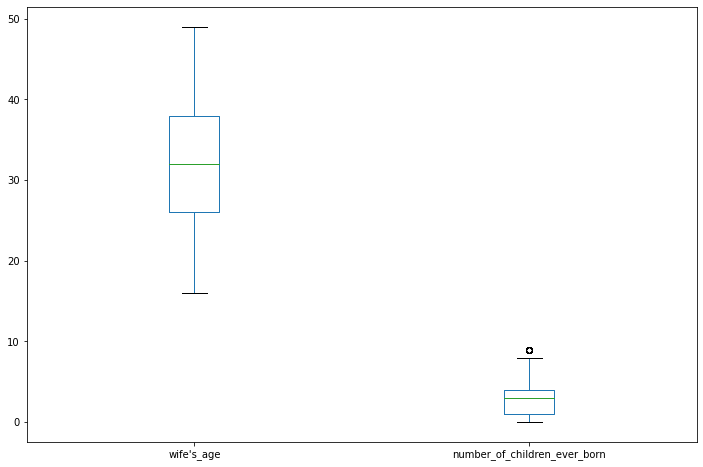

In [65]:
df_cmc[numerical_continous].plot.box(figsize = (12, 8))

In [67]:
df_cmc.shape

(1443, 10)

In [66]:
le = LabelEncoder()
for column in numerical_continous: 
    df_cmc[column] = pd.qcut(df_cmc[column], q = [0, 0.25, 0.50, 0.75, 1])
    df_cmc[column] = le.fit_transform(df_cmc[column])

<AxesSubplot:xlabel='number_of_children_ever_born', ylabel='count'>

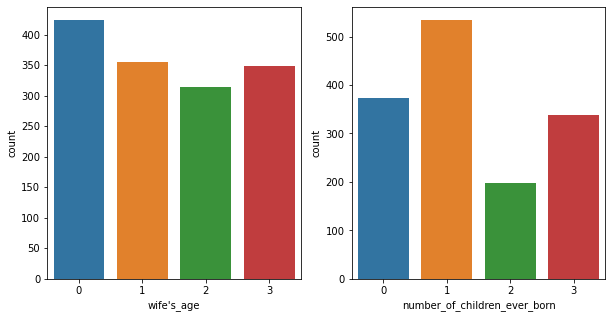

In [68]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(data=df_cmc,x="wife's_age",ax=ax[0])
sns.countplot(data=df_cmc,x="number_of_children_ever_born",ax=ax[1])

In [ ]:
#heatmap
corr=df_cmc.corr()
mask=np.zeros_like(corr,dtype=bool)
mask[np.triu_indices_from(mask)]=True
f,ax=plt.subplots(figsize=(17,15))
cmap="YlGnBu"
ax.set_title('Correlation')
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True,annot=True,linewidth=.5,cbar_kws={'shrink':.5})

From the heatmap:
There is low positive and negative correlation between the features and the target variable(contraceptive method used).

Husbands education and wifes education are highly positively correlated with a correlation of 0.62 and also number of children 
and wifes age with a correlation of 0.52.

## Model Building

Our data is already encoded  so we'll use as it is.

## Feature Selection /Dimentionalty reduction

In [69]:
x=df_cmc.drop('contraceptive_method_used',axis=1)
y=df_cmc['contraceptive_method_used']

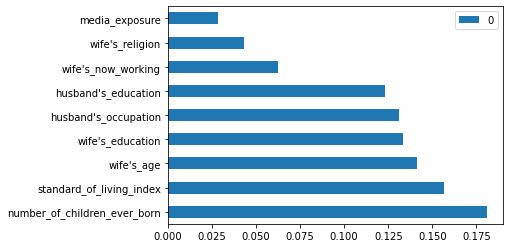

In [70]:
from sklearn.ensemble import ExtraTreesClassifier

fi = ExtraTreesClassifier()
fi.fit(x, y)

df_fi_a = pd.DataFrame(fi.fit(x,y).feature_importances_,index=x.columns)
df_fi_a.nlargest(10,df_fi_a.columns).plot(kind='barh')
plt.show()

#### Chisquare Test
HO: Independent

H1:Not Independen

In [71]:
chi2_check = []
for column in x.columns:
    if (chi2_contingency(pd.crosstab(df_cmc['contraceptive_method_used'], df_cmc[column]))[1] < 0.05):
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
res = pd.DataFrame(data = [x.columns, chi2_check]).T 
res.columns = ['Column', 'Hypothesis']
print(res)

                         Column                      Hypothesis
0                    wife's_age          Reject Null Hypothesis
1              wife's_education          Reject Null Hypothesis
2           husband's_education          Reject Null Hypothesis
3  number_of_children_ever_born          Reject Null Hypothesis
4               wife's_religion          Reject Null Hypothesis
5            wife's_now_working  Fail to Reject Null Hypothesis
6          husband's_occupation          Reject Null Hypothesis
7      standard_of_living_index          Reject Null Hypothesis
8                media_exposure          Reject Null Hypothesis


In [72]:
res[res['Hypothesis'] == 'Reject Null Hypothesis']['Column']

0                      wife's_age
1                wife's_education
2             husband's_education
3    number_of_children_ever_born
4                 wife's_religion
6            husband's_occupation
7        standard_of_living_index
8                  media_exposure
Name: Column, dtype: object

In [73]:
chi_scores=chi2(x,y)

In [74]:
chi_scores

p_values=pd.Series(chi_scores[1],index=x.columns)
p_values.sort_values(ascending =False,inplace=True)

<AxesSubplot:>

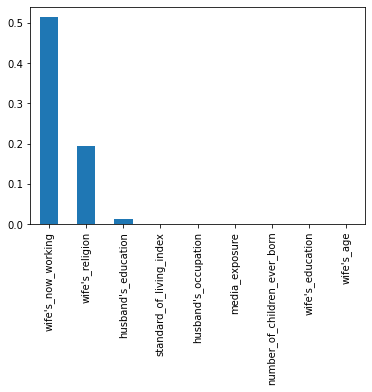

In [75]:
p_values.plot.bar()

since wifes now working has a higher p-value ,it says that this variable is 
independent of the response and cannot be cosidered for model training.

In [76]:
select_feature=SelectKBest(chi2,k=5).fit(x,y)
print('Score list:',select_feature.scores_)
print('Feature list:',x.columns)

Score list: [52.88083819 43.50375109  8.82303276 41.60125671  3.26989292  1.32858768
 18.28991001 17.8413632  27.66258036]
Feature list: Index(['wife's_age', 'wife's_education', 'husband's_education',
       'number_of_children_ever_born', 'wife's_religion', 'wife's_now_working',
       'husband's_occupation', 'standard_of_living_index', 'media_exposure'],
      dtype='object')


In [77]:
select_feature

SelectKBest(k=5, score_func=<function chi2 at 0x09939778>)

## Principal Component Analysis

In [ ]:
PCA is a dimensionality reduction method that is used to reduce dimensionality of large datasets by transforming large set
of variables into smaller one that still contains 

### Splitting

In [78]:
from sklearn.model_selection import train_test_split, cross_val_score

X_selected = x[res[res['Hypothesis'] == 'Reject Null Hypothesis']['Column']]
X_selected

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size = 0.3, random_state = 0)

### Standardization

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [80]:
y_train.value_counts()

1    436
3    364
2    210
Name: contraceptive_method_used, dtype: int64

### Oversampling

In [81]:
from imblearn.over_sampling import SMOTE
from collections import Counter

oversample = SMOTE(random_state=42)

X_train_over, y_train_over= oversample.fit_resample(X_train, y_train)
print(Counter(y_train_over))

X_test_over, y_test_over = oversample.fit_resample(X_test, y_test)
print(Counter(y_test_over))

Counter({1: 436, 2: 436, 3: 436})
Counter({1: 173, 2: 173, 3: 173})


## Classification models

In [82]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
log_reg = LogisticRegression(random_state = 0)
svm_clf = SVC(random_state = 0)
knn_clf = KNeighborsClassifier()
rf_clf = RandomForestClassifier(random_state = 0)
dt_clf=DecisionTreeClassifier()

classifiers = {'LogisticRegression': log_reg, 'SVC': svm_clf, 'KNeighborsClassifier': knn_clf,
          'RandomForestClassifier': rf_clf,'DecisionTreeClassifier':dt_clf}

In [83]:
def model_training_testing(classifiers):
    for model_name, model in classifiers.items():
        model.fit(X_train_over, y_train_over)
        y_predict_train = model.predict(X_train_over)
        y_predict_test = model.predict(X_test_over)
        print(f'{model_name} Training Accuracy:', accuracy_score(y_train_over, np.round(y_predict_train)))
        print(f'{model_name} Testing Accuracy:', accuracy_score(y_test_over, np.round(y_predict_test)))
        print('\n')

In [84]:
model_training_testing(classifiers)

LogisticRegression Training Accuracy: 0.5290519877675841
LogisticRegression Testing Accuracy: 0.5183044315992292


SVC Training Accuracy: 0.6353211009174312
SVC Testing Accuracy: 0.5433526011560693


KNeighborsClassifier Training Accuracy: 0.6827217125382263
KNeighborsClassifier Testing Accuracy: 0.48940269749518306


RandomForestClassifier Training Accuracy: 0.8394495412844036
RandomForestClassifier Testing Accuracy: 0.4816955684007707


DecisionTreeClassifier Training Accuracy: 0.8394495412844036
DecisionTreeClassifier Testing Accuracy: 0.441233140655106




SVC has the best training and testing scores compared to the other models.
Random Forest classifier has the best training score but the testing score isnt that good.

### Hyperparameter tuning

#### Logistic Regression 

In [86]:
lr = LogisticRegression()
lr_params = {"penalty": ['l2'], "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                  "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
grid_logistic = GridSearchCV(lr, lr_params)
grid_logistic.fit(x, y)
lr_best = grid_logistic.best_estimator_
besst=lr_best.fit(X_train,y_train)


In [96]:
lr_tuned=lr_best.fit(X_train,y_train)

In [99]:
def model_evaluation(model, x, y, model_name):
    y_predict = model.predict(x)
    print(f'Accuracy Score:', accuracy_score(y_test, np.round(y_predict_test)))
    print(f'Model: {model_name} \n \n Classification Report: {classification_report(y, y_predict)}')

    cnf_matrix = confusion_matrix(y, y_predict)
    
    class_names = [0, 1]
    tick_marks = np.arange(len(class_names))
    plt.figure(figsize = (9, 7))

    sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')

    plt.title(f'{model_name} Confusion Matrix', y = 1.1, fontsize = 22)
    plt.ylabel('Actual Label', fontsize = 15)
    plt.xlabel('Predicted Label', fontsize = 15)


Accuracy Score: 0.48498845265588914
Model: Linear Regression Classifier Tuned 
 
 Classification Report:               precision    recall  f1-score   support

           1       0.52      0.68      0.59       173
           2       0.56      0.31      0.40       118
           3       0.39      0.40      0.40       142

    accuracy                           0.48       433
   macro avg       0.49      0.46      0.46       433
weighted avg       0.49      0.48      0.47       433



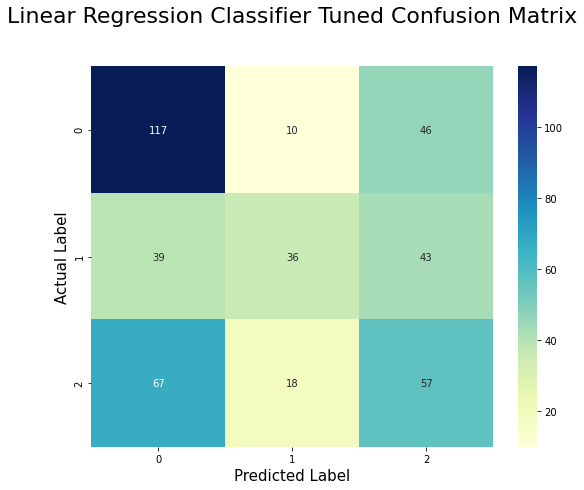

In [100]:
model_evaluation(lr_tuned, X_test, y_test, model_name = 'Linear Regression Classifier Tuned')

there is no improvement in the scores .

#### svc

In [ ]:
svc = SVC()
svc_params = {"C": [0.5, 0.7, 0.9, 1], "kernel":['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(svc, svc_params)
grid_svc.fit(X, y)
svc_best = grid_svc.best_estimator_
model_svc=svc_best.fit(X_train,y_train)

In [ ]:
y_predict_train = model_svc.predict(X_train)
y_predict_test = model_svc.predict(X_test)
print(f'svc Training Accuracy:', accuracy_score(y_train, np.round(y_predict_train)))
print(f'svc Testing Accuracy:', accuracy_score(y_test, np.round(y_predict_test)))
print('\n')


no improvement in the scores after tuning

#### Random Forest

In [ ]:
## Random Forest 

params = {'n_estimators': np.arange(10, 100, 10), 'random_state': [0], 'n_jobs': [1, -1]} 
grid_search = GridSearchCV(RandomForestClassifier(), params, n_jobs = -1, cv = 5)

grid_search.fit(X_train, y_train)

rfc_best=grid_search.best_estimator_

In [ ]:
model_rfc=rfc_best.fit(X_train, y_train)

In [ ]:
y_predict_train = model_rfc.predict(X_train)
y_predict_test = model_rfc.predict(X_test)
print(f'RandomForestClassifier Training Accuracy:', accuracy_score(y_train, np.round(y_predict_train)))
print(f'RandomForestClassifier Testing Accuracy:', accuracy_score(y_test, np.round(y_predict_test)))
print('\n')

no improvement 

#### Decision Tree

In [109]:
tree = DecisionTreeClassifier()
tree_params = {"criterion": ['gini', 'entropy'], 
               "max_depth":list(range(2,5,1)),
               "max_features": [1,2,3,4,5,6,7,8,9],
               "min_samples_leaf":list(range(5,7,1))}
grid_tree = GridSearchCV(tree, tree_params,cv=10)
grid_tree.fit(x, y)
tree_best = grid_tree.best_estimator_

In [112]:
dt_tuned=tree_best.fit(X_train,y_train)

In [ ]:
y_predict_train = model_dt.predict(X_train)
y_predict_test = model_dt.predict(X_test)
print(f'DecisionTreeClassifier Training Accuracy:', accuracy_score(y_train, np.round(y_predict_train)))
print(f'DecisionTreeClassifier Testing Accuracy:', accuracy_score(y_test, np.round(y_predict_test)))
print('\n')

Accuracy Score: 0.48498845265588914
Model: Decision Tree Classifier Tuned 
 
 Classification Report:               precision    recall  f1-score   support

           1       0.55      0.52      0.54       173
           2       0.59      0.29      0.39       118
           3       0.42      0.63      0.51       142

    accuracy                           0.49       433
   macro avg       0.52      0.48      0.48       433
weighted avg       0.52      0.49      0.49       433



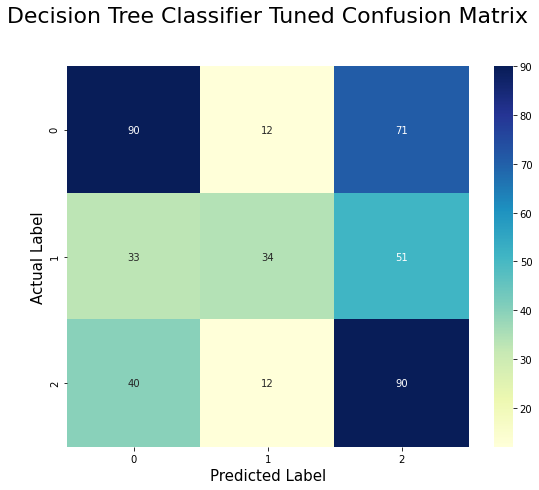

In [113]:
model_evaluation(dt_tuned, X_test, y_test, model_name = 'Decision Tree Classifier Tuned')

theres an improvement in the testing scores 

##### KNearest Neighbors

In [119]:

knear = KNeighborsClassifier()
knear_params = {"n_neighbors": list(range(2,7,1)), "weights":['uniform','distance'],
                "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
              "metric":['euclidean','manhattan','minkowski'] }
grid_knear = GridSearchCV(knear, knear_params,cv=10)
grid_knear.fit(x, y)
knear_best = grid_knear.best_estimator_

In [120]:
knn_tuned=knear_best.fit(X_train,y_train)

Accuracy Score: 0.48498845265588914
Model: KNearest Neighbours Classifier Tuned 
 
 Classification Report:               precision    recall  f1-score   support

           1       0.50      0.59      0.54       173
           2       0.48      0.30      0.37       118
           3       0.36      0.39      0.37       142

    accuracy                           0.45       433
   macro avg       0.45      0.43      0.43       433
weighted avg       0.45      0.45      0.44       433



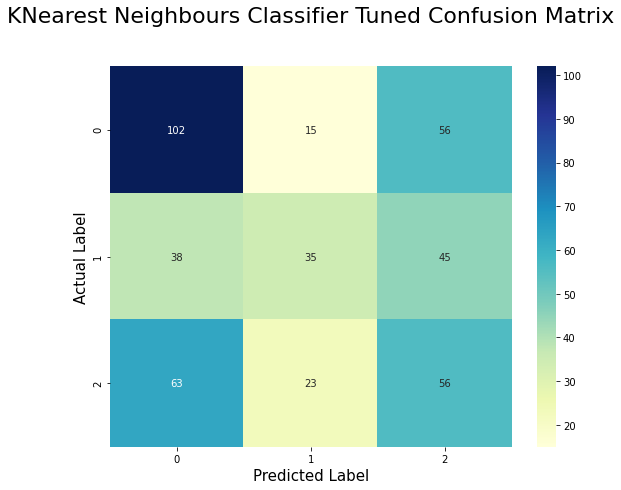

In [121]:
model_evaluation(knn_tuned, X_test, y_test, model_name = 'KNearest Neighbours Classifier Tuned')

no significant improvement in the models performance

SVC,decision tree and the linear regression classifier are doing significantly well but can we do better?

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
model=svc_clf_tuned
model=CalibratedClassifierCV(model)
model.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_prob = roc_auc_score(y_test,model.predict_proba(X_test),multi_class='ovr')
print(f'Area Under the Curve Score: {y_pred_prob}')

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

df_roc = pd.DataFrame([fpr, tpr]).T
df_roc.columns = ['False Positive Ratio', 'True Positive Ratio']

import plotly.express as px

fig = px.line(df_roc, x = 'False Positive Ratio', y = 'True Positive Ratio')
fig.update_layout(title = dict(text = "ROC Curve.", y = 0.95, x = 0.5,
                               xanchor = 'center', yanchor = 'top', font = dict(size = 20))) 

In [ ]:
ac2=accuracy_score(y_test,grid_predictions)
print("Accuracy is %:" ,ac2*100)
cm2=confusion_matrix(y_test,grid_predictions)
ax=sns.heatmap(cm2,annot=True,linewidth=.5,fmt='d')

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_prob = rf_clf_tuned.predict_proba(X_test)[:, 1]
print(f'Area Under the Curve Score: {roc_auc_score(y_test, y_pred_prob)}')